![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


**Preprocessing of the Dataset**

In [10]:
# Verificar si existen valores vacíos en el conjunto de datos
missing_values = df.isnull().any()

# Mostrar las columnas con valores vacíos y la cantidad de valores nulos en cada una
print("Columnas con valores vacíos:")
print(missing_values[missing_values == True])



Columnas con valores vacíos:
Series([], dtype: bool)


Al ser nuestro array vacío se verifica que no se encuentran datos vacíos en el Datset

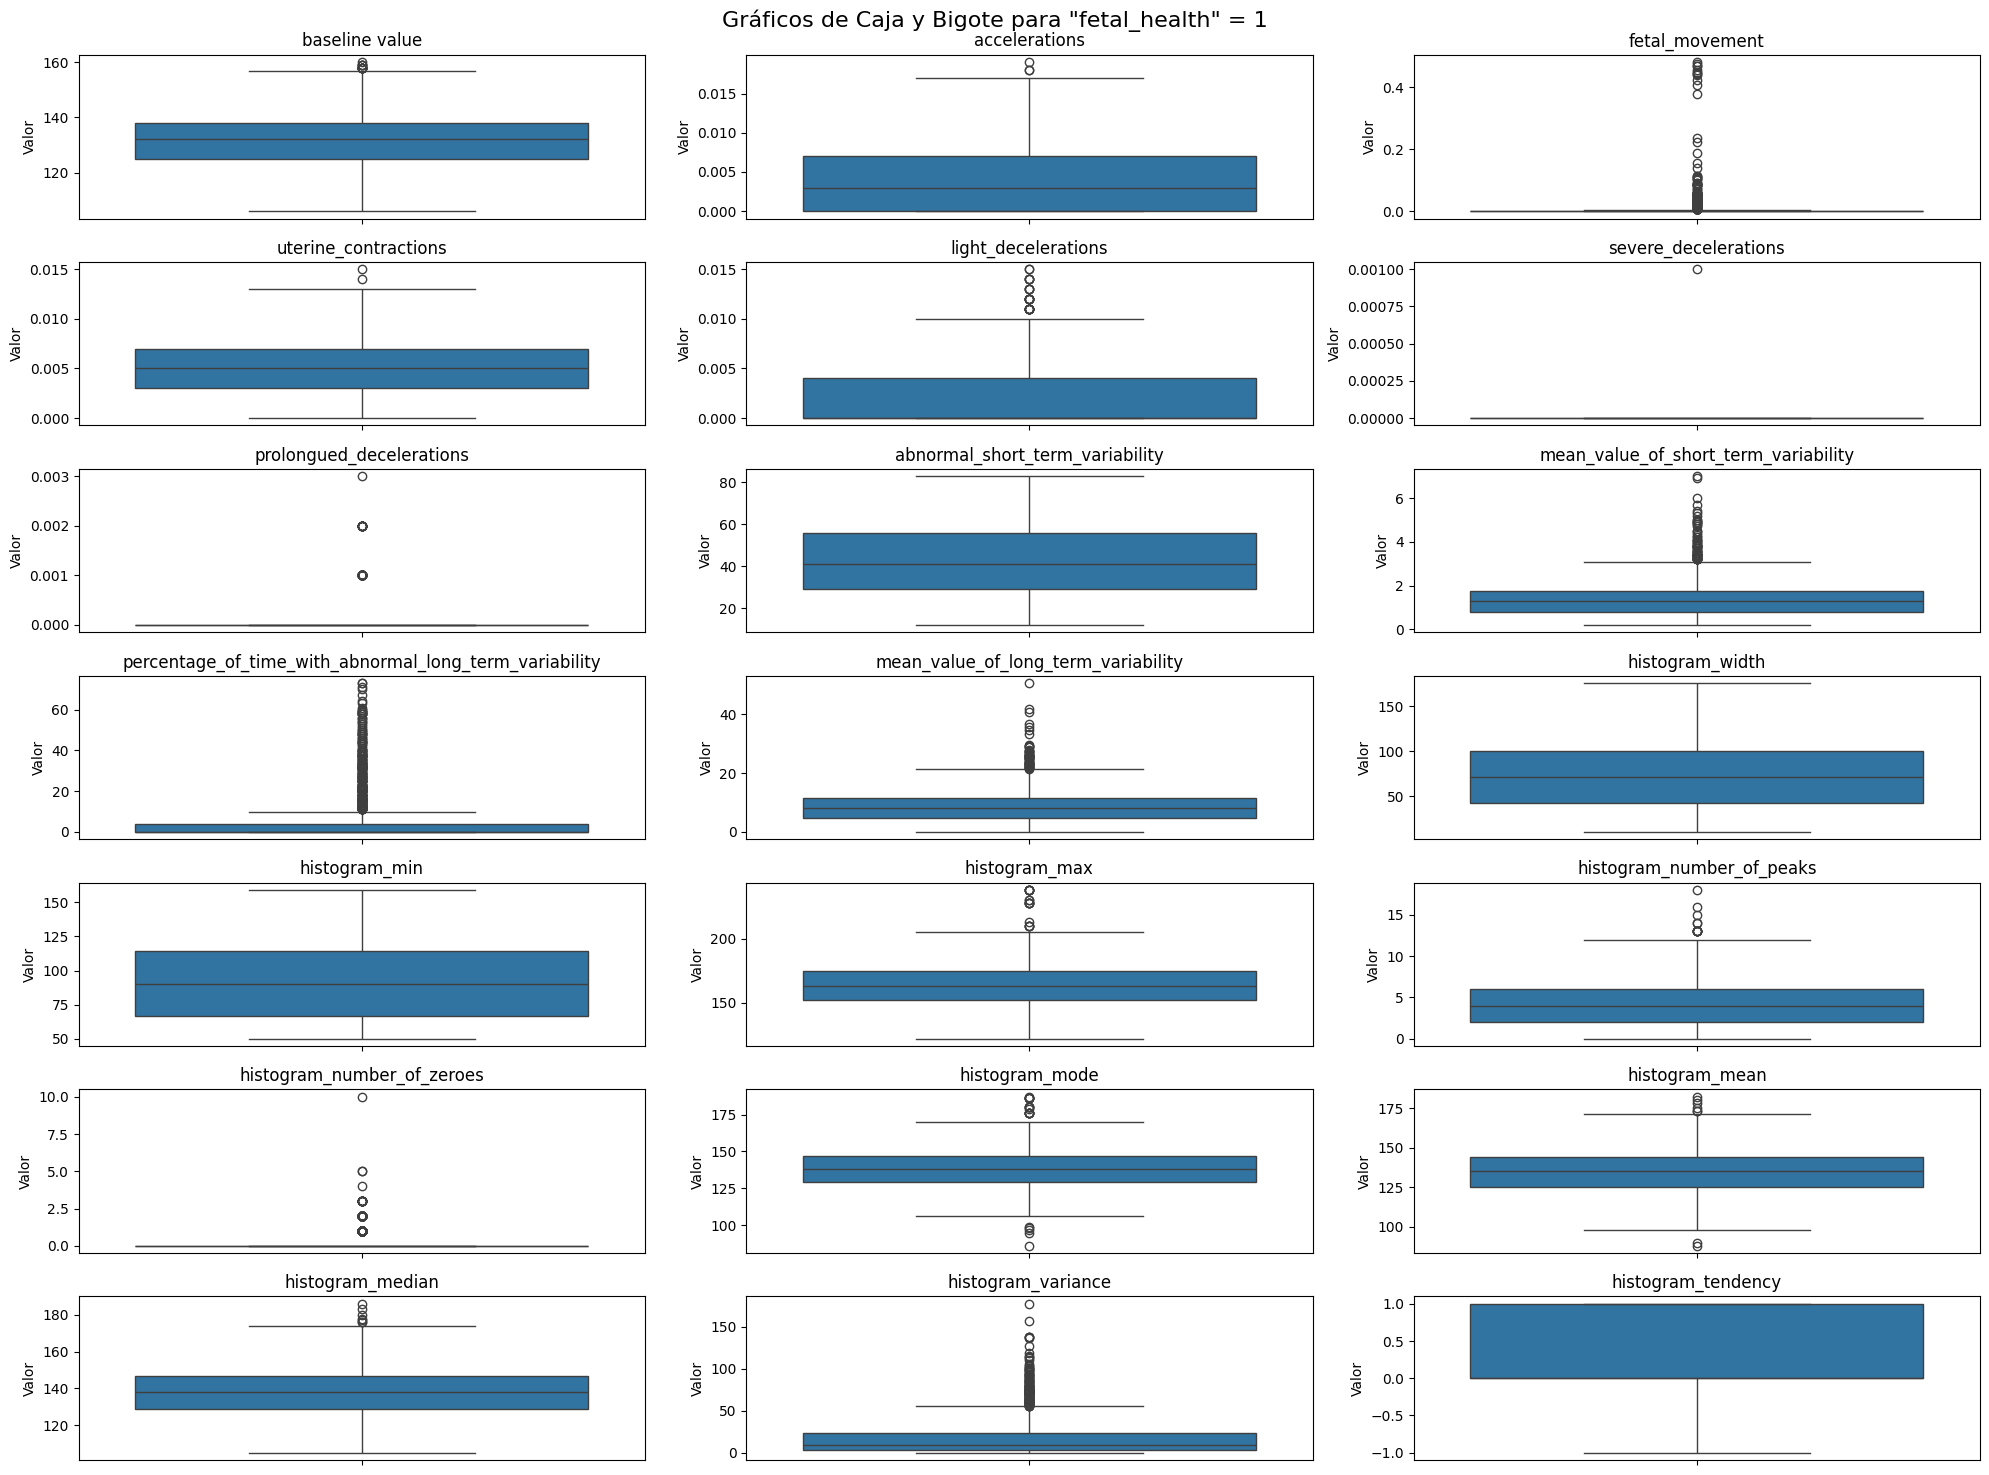

In [13]:
# Filtrar los datos para "fetal_health" igual a 1
subset_fetal_health_1 = df[df['fetal_health'] == 1]

# Crear gráficos de caja y bigote para cada característica
plt.figure(figsize=(20, 15))
plt.suptitle('Gráficos de Caja y Bigote para "fetal_health" = 1', fontsize=16)
for i, column in enumerate(subset_fetal_health_1.columns[:-1]):  # Excluir la columna "fetal_health"
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y=column, data=subset_fetal_health_1)
    plt.title(column)
    plt.ylabel('Valor')
plt.tight_layout()
plt.show()


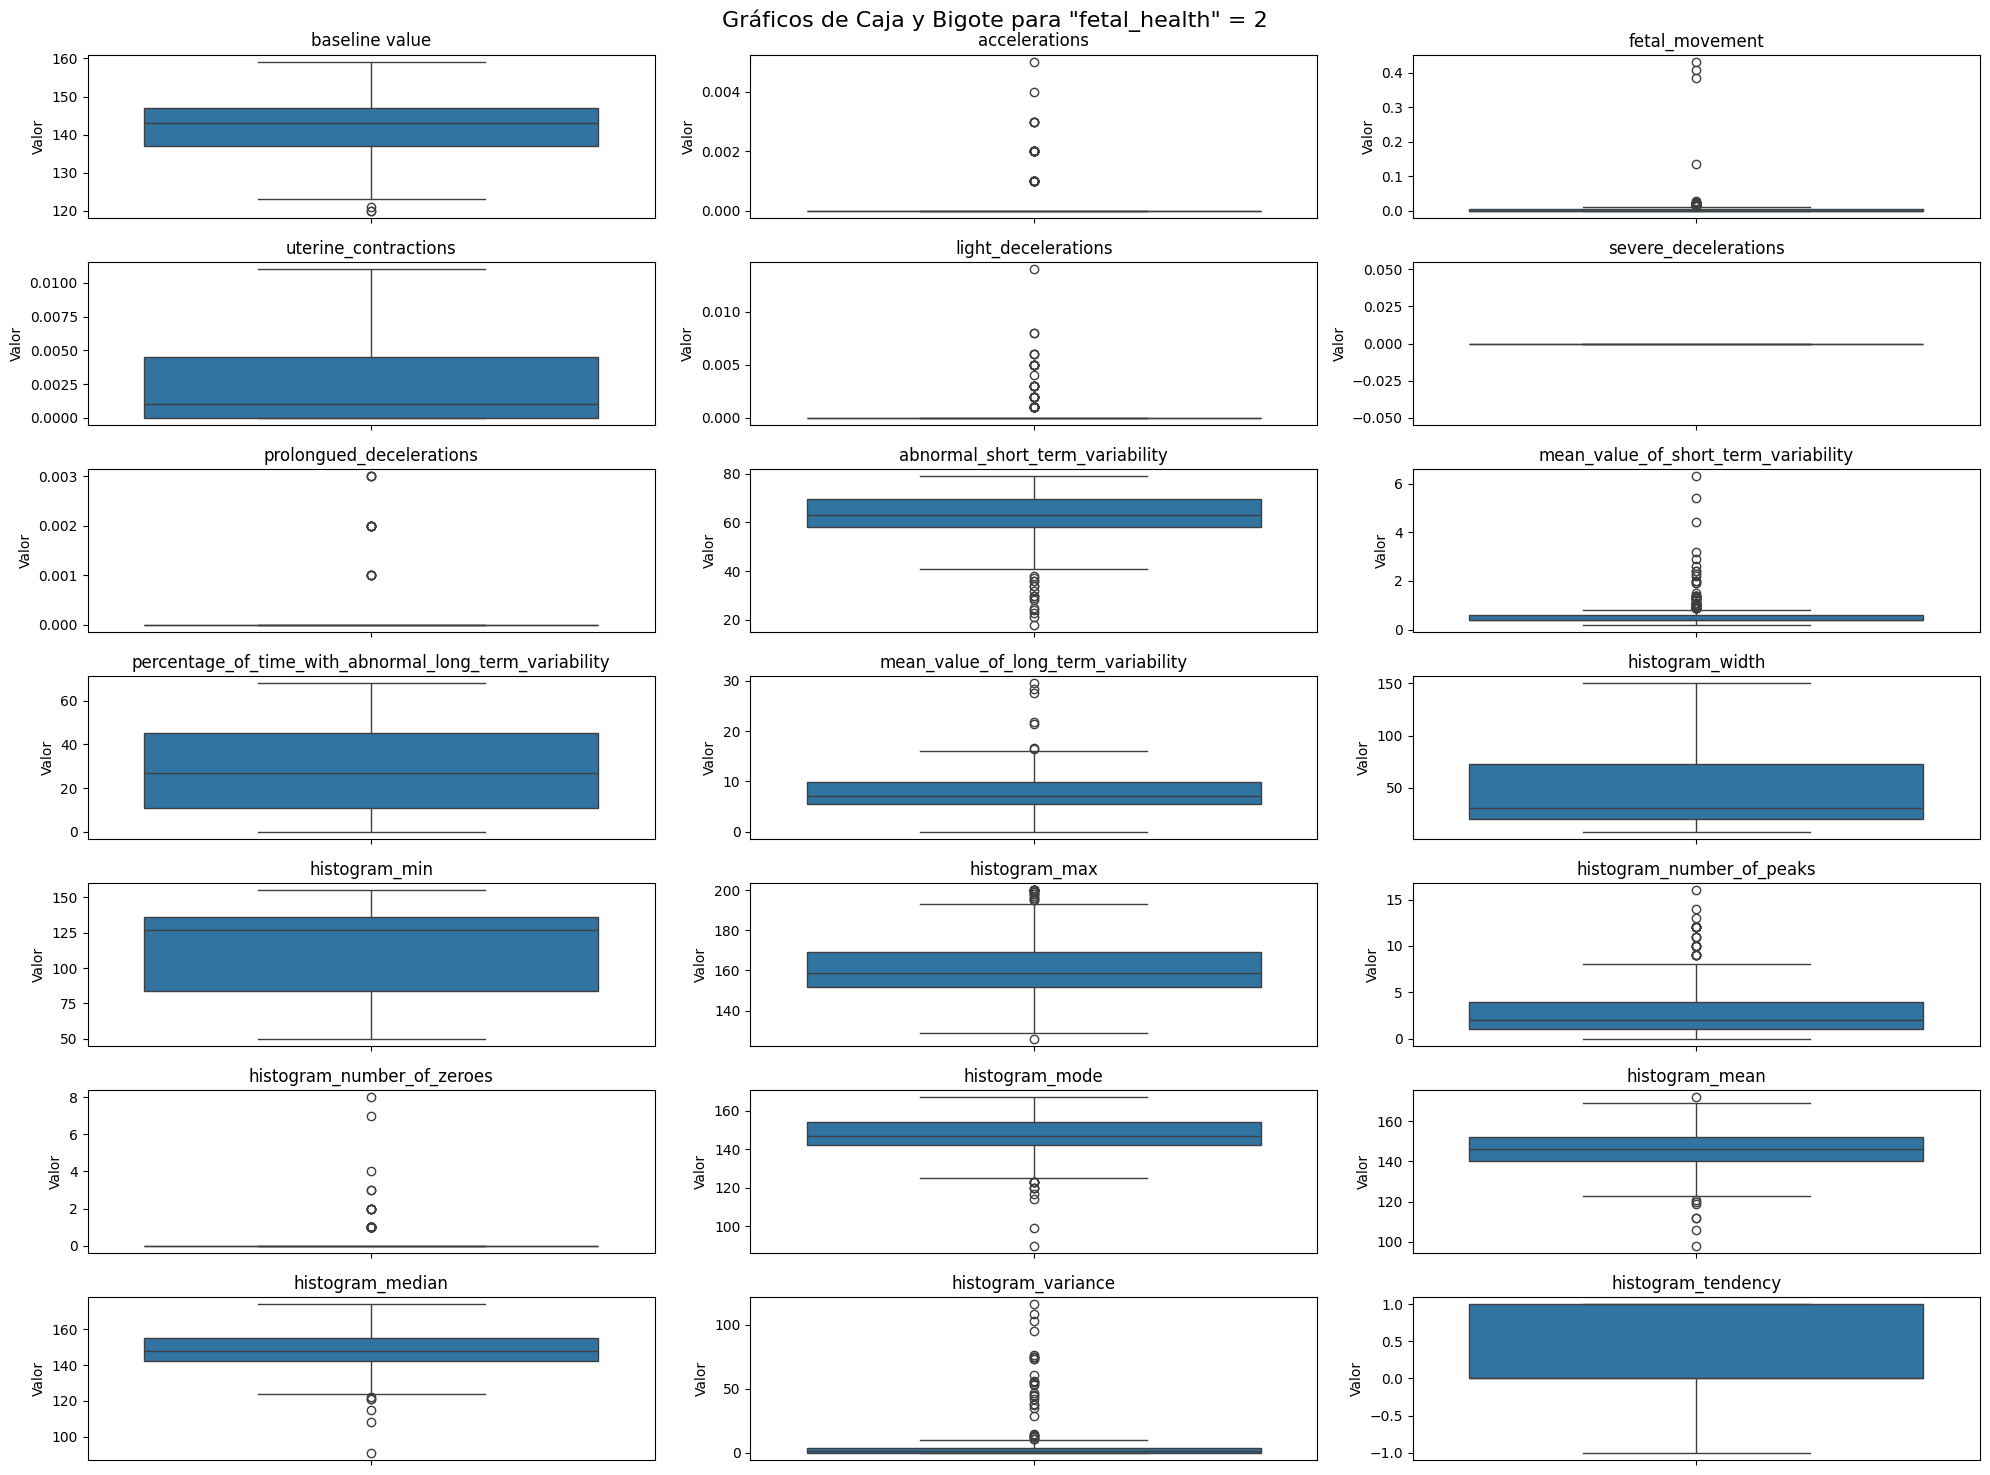

In [14]:
# Filtrar los datos para "fetal_health" igual a 2
subset_fetal_health_2 = df[df['fetal_health'] == 2]

# Crear gráficos de caja y bigote para cada característica
plt.figure(figsize=(20, 15))
plt.suptitle('Gráficos de Caja y Bigote para "fetal_health" = 2', fontsize=16)
for i, column in enumerate(subset_fetal_health_2.columns[:-1]):  # Excluir la columna "fetal_health"
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y=column, data=subset_fetal_health_2)
    plt.title(column)
    plt.ylabel('Valor')
plt.tight_layout()
plt.show()

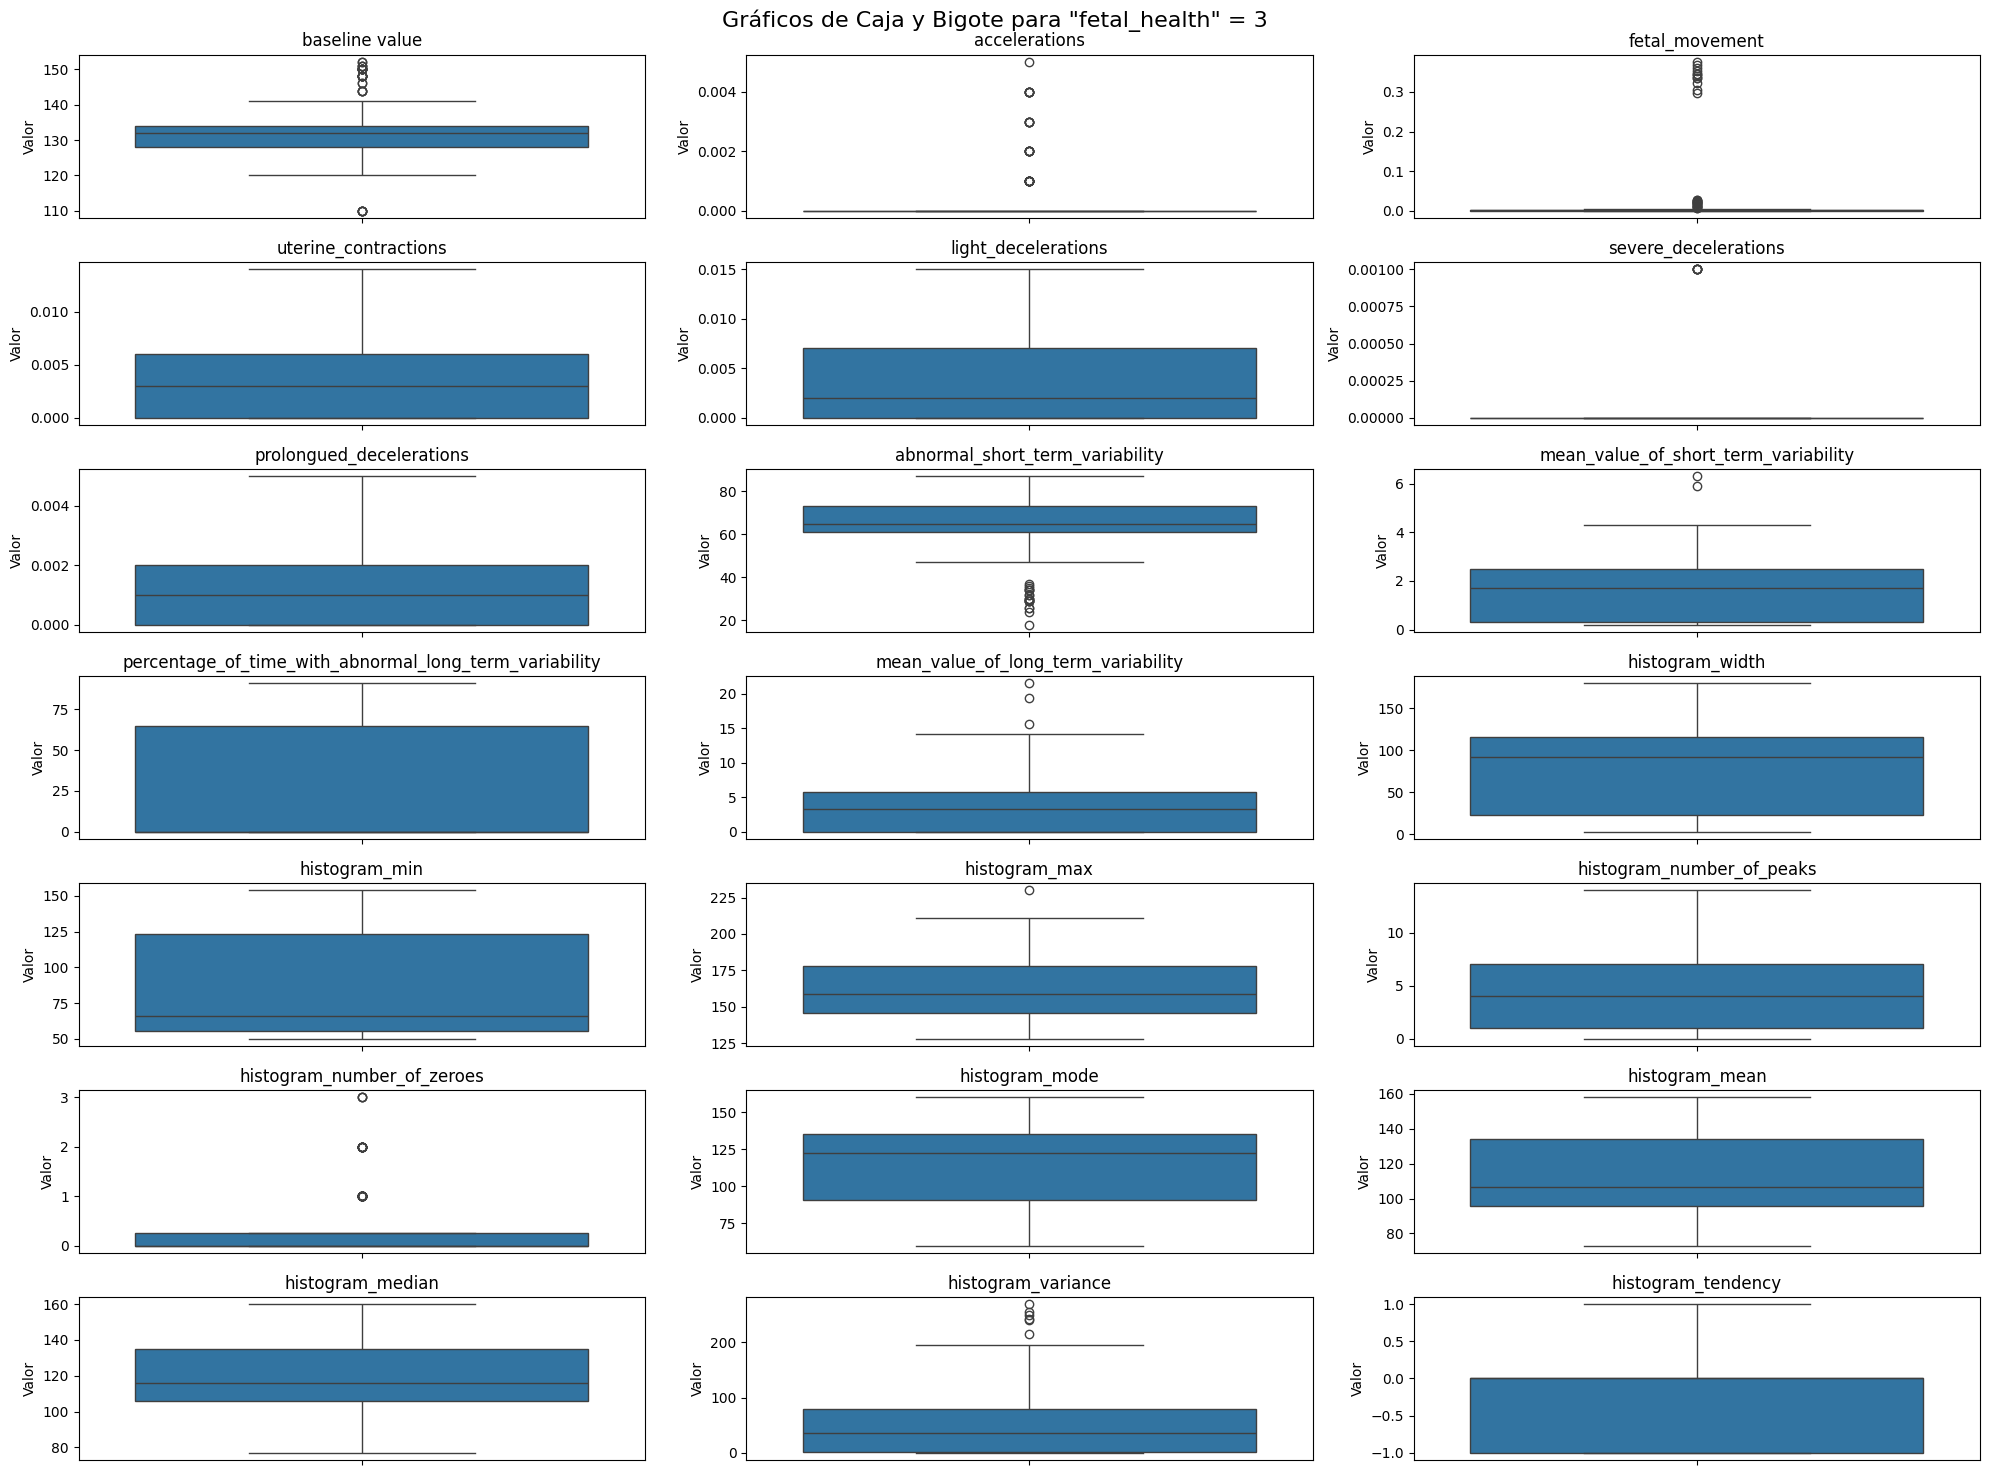

In [15]:
# Filtrar los datos para "fetal_health" igual a 3
subset_fetal_health_1 = df[df['fetal_health'] == 3]

# Crear gráficos de caja y bigote para cada característica
plt.figure(figsize=(20, 15))
plt.suptitle('Gráficos de Caja y Bigote para "fetal_health" = 3', fontsize=16)
for i, column in enumerate(subset_fetal_health_1.columns[:-1]):  # Excluir la columna "fetal_health"
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y=column, data=subset_fetal_health_1)
    plt.title(column)
    plt.ylabel('Valor')
plt.tight_layout()
plt.show()

Como podemos ver existen valores anómalos presentes en la distribución para cada clasificación de "fetal_health". De estos también podemos apreciar que existen clasificaciones (features) las cuales no presentan una distribución standard entre los sujetos ("fetal_movement" por ejemplo), estas las vamos a proceder a eliminar (no las vamos a tomar en cuenta para los modelos de clasificación) así como los valores anómalos para no afectar la clasificación de los modelos.

Para los casos en que los valores atípicos son pocos, se procederá a realizar técnicas de "inputación"

In [16]:
# Seleccionar características y variable objetivo
X = df.drop(columns=["fetal_health", "fetal_movement"])  # Características
y = df["fetal_health"]  # Variable objetivo


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear los modelos
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)  # Elige k basado en el número de categorías

# Entrenar los modelos
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [30]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Evaluación de los modelos en conjunto de prueba
print("Decision Tree:")
print(classification_report(y_test, decision_tree.predict(X_test)))

print("Random Forest:")
print(classification_report(y_test, random_forest.predict(X_test)))

print("KNN:")
print(classification_report(y_test, knn.predict(X_test)))

# Validación cruzada
cv_scores_decision_tree = cross_val_score(decision_tree, X, y, cv=5)
cv_scores_random_forest = cross_val_score(random_forest, X, y, cv=5)
cv_scores_knn = cross_val_score(knn, X, y, cv=5)

print("Cross Validation Scores:")
print("Decision Tree:", cv_scores_decision_tree.mean())
print("Random Forest:", cv_scores_random_forest.mean())
print("KNN:", cv_scores_knn.mean())


Decision Tree:
              precision    recall  f1-score   support

         1.0       0.96      0.94      0.95       333
         2.0       0.75      0.78      0.76        64
         3.0       0.75      0.83      0.79        29

    accuracy                           0.91       426
   macro avg       0.82      0.85      0.83       426
weighted avg       0.91      0.91      0.91       426

Random Forest:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.85      0.78      0.81        64
         3.0       0.82      0.79      0.81        29

    accuracy                           0.94       426
   macro avg       0.88      0.85      0.86       426
weighted avg       0.93      0.94      0.94       426

KNN:
              precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       333
         2.0       0.81      0.69      0.75        64
         3.0       0.83      0.83      0

Utilizamos el modelo de Validación Cruzada (Cross-Validation) para poder evaluar la robustez de nuestro modelo. Aquí verificamos si se encuentra Overfitted, Underfitted.

In [31]:
from sklearn.model_selection import cross_val_score

# Lista de modelos
modelos = [decision_tree, random_forest, knn]

# Realizar validación cruzada para cada modelo
for modelo in modelos:
    scores = cross_val_score(modelo, X, y, cv=5)  # cv=5 indica que se utilizarán 5 particiones para la validación cruzada
    print(f"Modelo: {modelo.__class__.__name__}")
    print(f"Puntajes de validación cruzada: {scores}")
    print(f"Puntuación media: {scores.mean()}")
    print()


Modelo: DecisionTreeClassifier
Puntajes de validación cruzada: [0.84507042 0.84470588 0.85882353 0.84235294 0.75529412]
Puntuación media: 0.8292493786246892

Modelo: RandomForestClassifier
Puntajes de validación cruzada: [0.86384977 0.90117647 0.92       0.87058824 0.76941176]
Puntuación media: 0.8650052471692902

Modelo: KNeighborsClassifier
Puntajes de validación cruzada: [0.81220657 0.82117647 0.89882353 0.83529412 0.70823529]
Puntuación media: 0.8151471969069318



Podemos ver que los resultados de la clasficicación cruzada son diferentes en demasía a los valores de métricas obtenidos en la matriz de confusión, podemos concluir que los modelos creados están Overfitteados, esto lo podemos solucionar mejorando la distribución de los datos en el preprocesamiento por ejemplo.

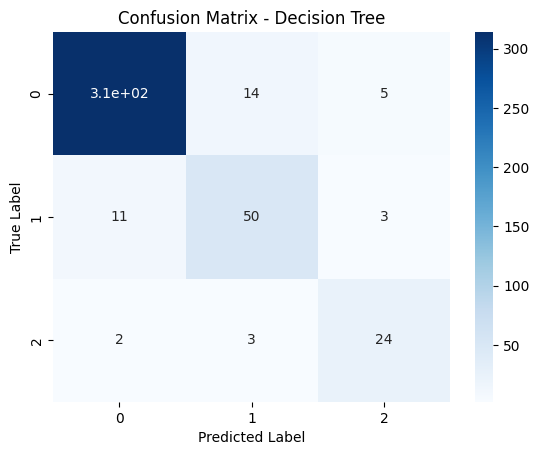

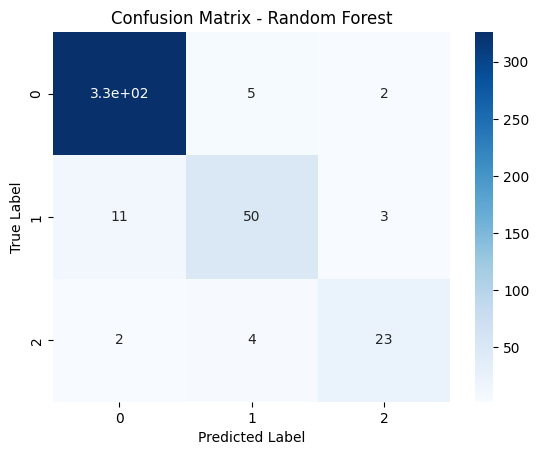

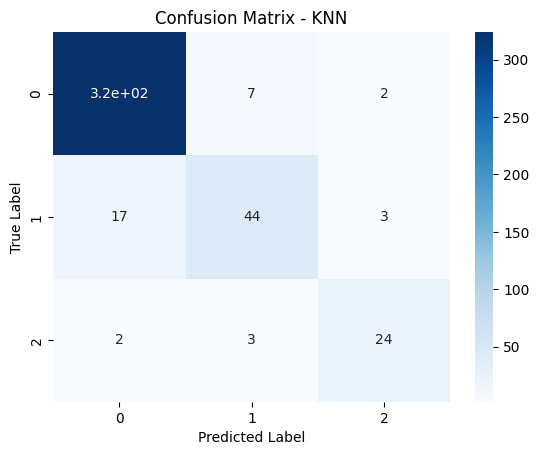

In [32]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión para Decision Tree
sns.heatmap(confusion_matrix(y_test, decision_tree.predict(X_test)), annot=True, cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Matriz de confusión para Random Forest
sns.heatmap(confusion_matrix(y_test, random_forest.predict(X_test)), annot=True, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Matriz de confusión para KNN
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Challenge 6

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model
best_decision_tree = grid_search.best_estimator_

# Evaluate the best model
accuracy = best_decision_tree.score(X_test, y_test)
print("Accuracy of the best model:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy of the best model: 0.9084507042253521


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model with best hyperparameters
best_decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='log2', min_samples_leaf=2, min_samples_split=2)

# Fit the model to the training data
best_decision_tree.fit(X_train, y_train)

# Predict on test data
y_pred = best_decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8802816901408451
Precision: 0.8742971261208374
Recall: 0.8802816901408451
F1-score: 0.8719827738359983


In [38]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler",StandardScaler()),("decisiontree",DecisionTreeClassifier())])
pipe.set_params(decisiontree__criterion='gini', decisiontree__max_depth=10, decisiontree__max_features='log2', decisiontree__min_samples_leaf=2, decisiontree__min_samples_split=2)
pipe.fit(X_train,y_train).score(X_train,y_train)
#predictions = pipe.predict(X_test)
#print(predictions)

0.9658823529411765